In [ ]:


#holtzworth map - ww already made, now need medi V 

#change bio maps color ranges VX

#show hlotzworth dots above bio maps ?? 

#histogram of lightnings in power ranges and in longitude ranges

#percipitation into account - maybe a bio map X 


In [1]:
import pandas as pd

df = pd.read_csv('../postprocessed/mediterranean lightnings 2009-2021.csv')
df

Date  Latitude  Longitude  Power (J)
0        2009/12/1   37.6420     4.9377   60484.92
1        2009/12/1   38.6991     8.3091    3046.67
2        2009/12/1   36.9608     4.2523    7787.19
3        2009/12/1   39.0087     5.9722     851.00
4        2009/12/1   37.3525     7.2369    5440.39
...            ...       ...        ...        ...
1360547  2022/1/25   32.2615    24.6026   12871.69
1360548  2022/1/25   35.7085    32.4864   23209.92
1360549  2022/1/25   34.8443    30.6639    1411.87
1360550  2022/1/25   32.4175    30.6500    1437.48
1360551  2022/1/25   32.5282    32.2153    1020.14

[1360552 rows x 4 columns]

In [1]:
import pandas as pd

df2 = pd.read_csv('../postprocessed/mediterranean lightnings 2009-2021.csv')
df2 = df2[df2["Latitude"]>30]
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2

Date  Latitude  Longitude  Power (J)  Year
0       2009-12-01   37.6420     4.9377   60484.92  2009
1       2009-12-01   38.6991     8.3091    3046.67  2009
2       2009-12-01   36.9608     4.2523    7787.19  2009
3       2009-12-01   39.0087     5.9722     851.00  2009
4       2009-12-01   37.3525     7.2369    5440.39  2009
...            ...       ...        ...        ...   ...
1360547 2022-01-25   32.2615    24.6026   12871.69  2022
1360548 2022-01-25   35.7085    32.4864   23209.92  2022
1360549 2022-01-25   34.8443    30.6639    1411.87  2022
1360550 2022-01-25   32.4175    30.6500    1437.48  2022
1360551 2022-01-25   32.5282    32.2153    1020.14  2022

[1360402 rows x 5 columns]

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

df = df2.copy()
# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap object with the desired projection and region
m = Basemap(
    projection='merc',
    llcrnrlon=-6,
    llcrnrlat=29,
    urcrnrlon=37,
    urcrnrlat=47,
    resolution='i'
)

# Draw coastlines, countries, and fill the land areas
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')

# Draw parallels and meridians
m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

# Set the title of the map
plt.title('KDE Map of the Mediterranean')

# Convert longitude and latitude coordinates to map projection coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Combine the x and y coordinates into a single array
points = np.vstack([x, y])

# Evaluate the KDE on the filtered coordinates
kde = gaussian_kde(points)
kde_values = kde.evaluate(points)

# Plot the KDE as a scatter plot with alpha blending
plt.scatter(x, y, c=kde_values, cmap='YlOrRd', s=8, alpha=0.7, vmin=0, vmax=0.000000000001)
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('KDE Values')

plt.savefig('../yearly kde/kde_map all years.png', dpi=300)

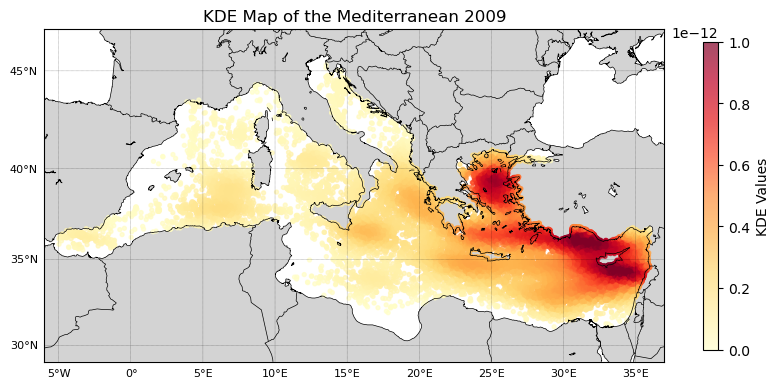

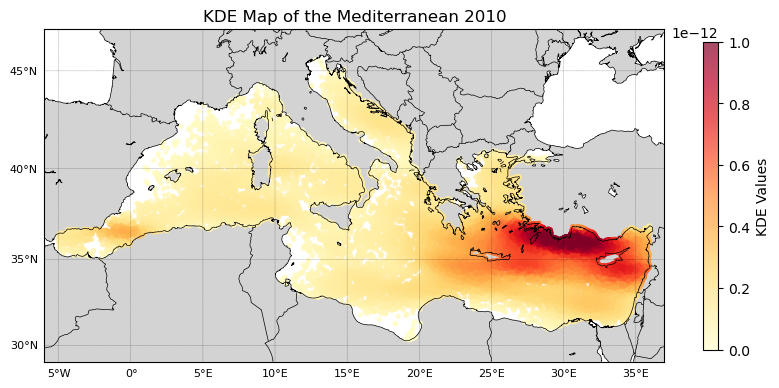

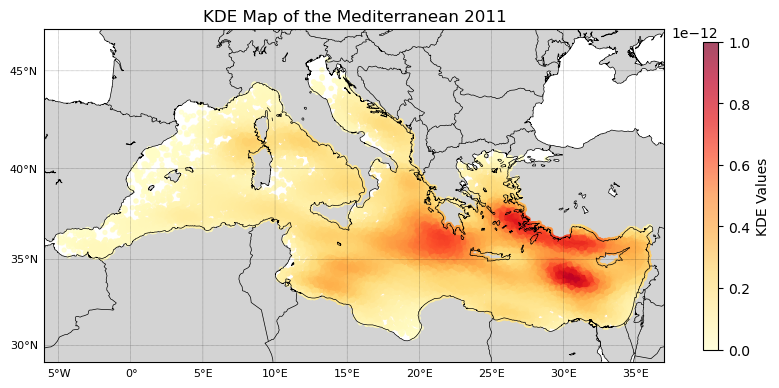

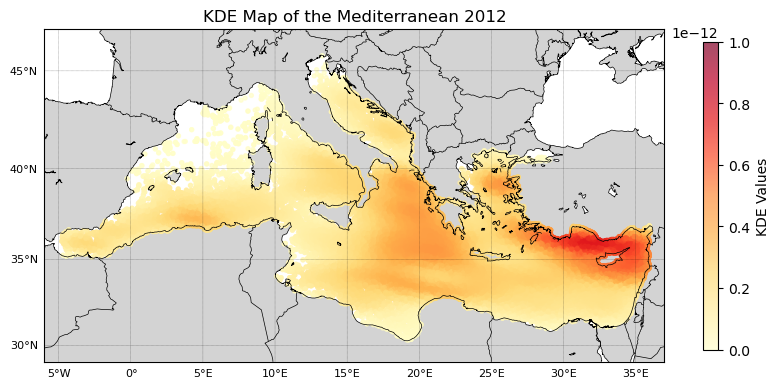

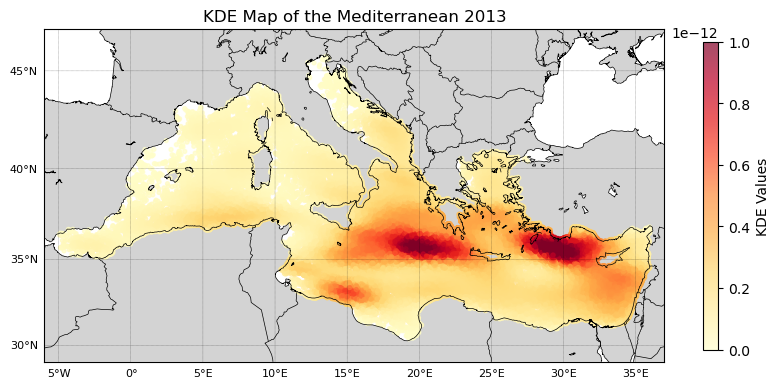

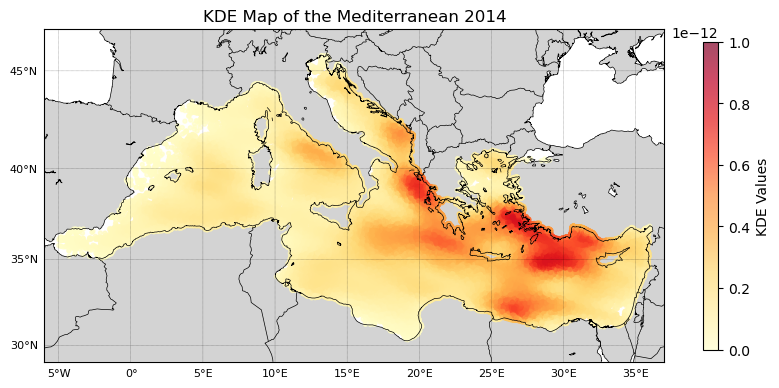

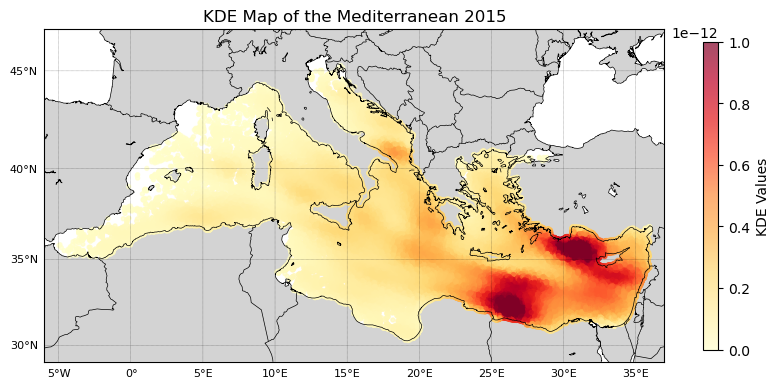

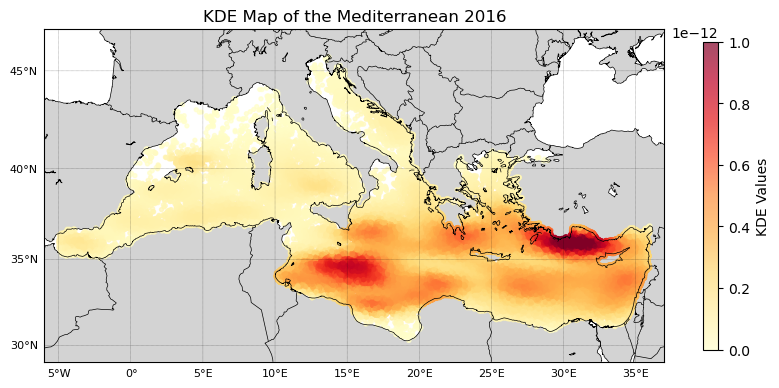

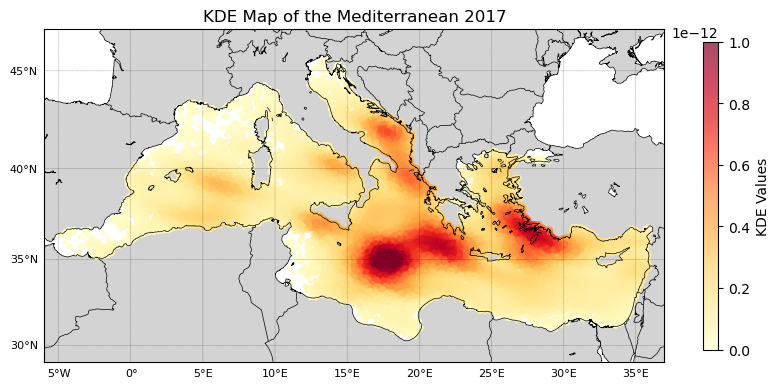

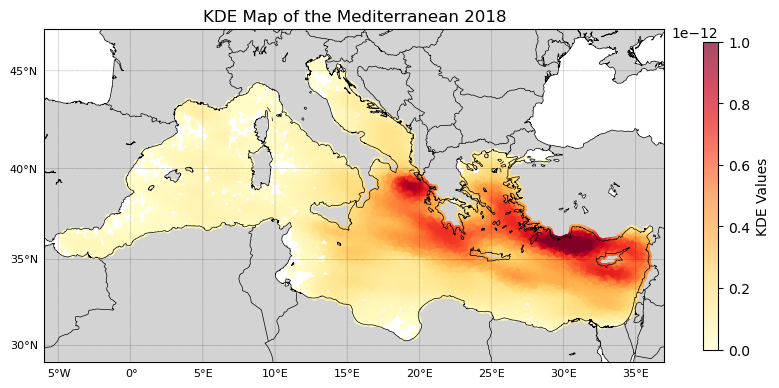

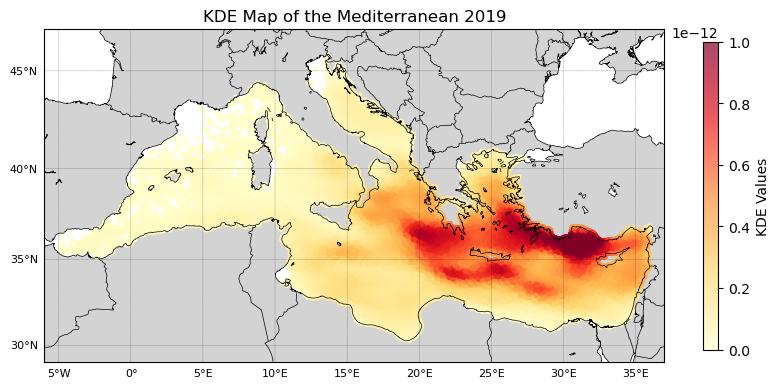

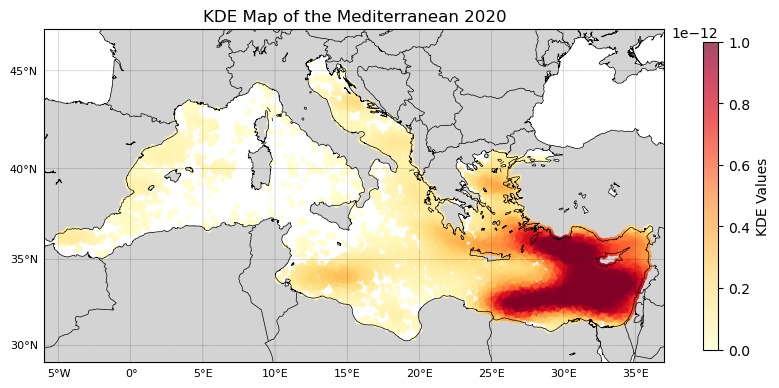

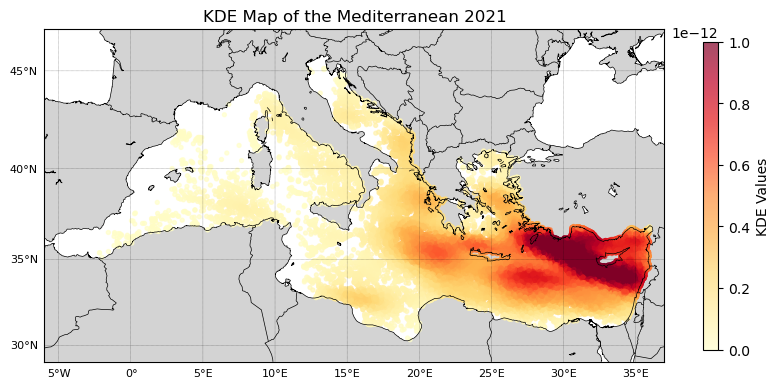

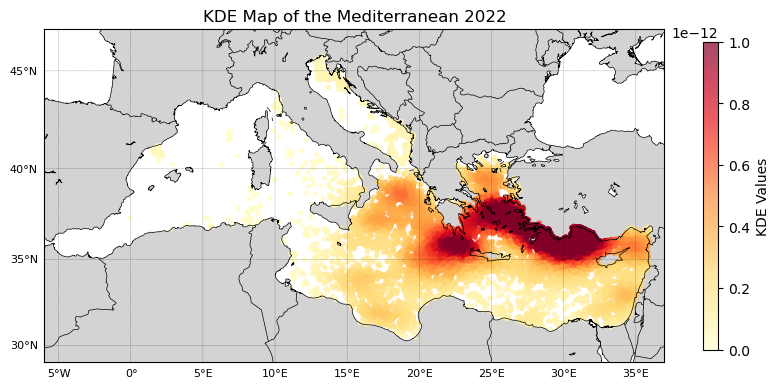

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

for i in range(2009,2023):
    df = df2[df2["Year"]==i]
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap object with the desired projection and region
    m = Basemap(
        projection='merc',
        llcrnrlon=-6,
        llcrnrlat=29,
        urcrnrlon=37,
        urcrnrlat=47,
        resolution='i'
    )

    # Draw coastlines, countries, and fill the land areas
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.fillcontinents(color='lightgray', lake_color='white')

    # Draw parallels and meridians
    m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
    m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

    # Set the title of the map
    plt.title('KDE Map of the Mediterranean '+str(i))

    # Convert longitude and latitude coordinates to map projection coordinates
    x, y = m(df['Longitude'].values, df['Latitude'].values)

    # Combine the x and y coordinates into a single array
    points = np.vstack([x, y])

    # Evaluate the KDE on the filtered coordinates
    kde = gaussian_kde(points)
    kde_values = kde.evaluate(points)

    # Plot the KDE as a scatter plot with alpha blending
    plt.scatter(x, y, c=kde_values, cmap='YlOrRd', s=8, alpha=0.7, vmin=0, vmax=0.000000000001)
    cbar = plt.colorbar(shrink=0.5)
    cbar.set_label('KDE Values')

    # Show the plot
    plt.savefig('../yearly kde/kde_map'+str(i)+'.png', dpi=300)


In [1]:
#kde mediterranean
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('../postprocessed/mediterranean lightnings 2009-2021.csv')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a basemap with the Robinson projection
m = Basemap(projection='merc',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')
# Convert the latitude and longitude columns to lists
lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

# Convert the latitude and longitude lists to numpy arrays
x, y = m(lons, lats)

# Calculate the KDE
kde = sns.kdeplot(x, y, ax=ax, cmap='Reds', thresh=0.1, shade=True, n_levels=50, bw_method=0.15)

# Add the basemap and the KDE to the plot
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

# Show the plot
plt.show()


c:\Users\chefi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
#kde worldwide
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df2 = pd.read_csv('../postprocessed/f ww date.csv')

# Load the data into a Pandas DataFrame
df = df2.copy()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 20))

# Create a basemap with the Robinson projection
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=85,\
            llcrnrlon=-179,urcrnrlon=179,lat_ts=0,resolution='c')
# Convert the latitude and longitude columns to lists
lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

# Convert the latitude and longitude lists to numpy arrays
x, y = m(lons, lats)

# Calculate the KDE
kde = sns.kdeplot(x, y, ax=ax, cmap='Blues', thresh=0.1, shade=True, n_levels=50, bw_method=0.3)

# Add the basemap and the KDE to the plot
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

# Show the plot
plt.show()


In [ ]:
#points worldwide superbolts
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a Pandas DataFrame
df = pd.read_csv("../postprocessed/ww with land superbolts.csv")

df2 = df[df["Power (J)"]>2000000]
df = df[df["Power (J)"]<2000000]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 40))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=85,\
            llcrnrlon=-179,urcrnrlon=179,lat_ts=0,resolution='c')
# Convert the latitude and longitude columns to lists
lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

lons2 = df2['Longitude'].tolist()
lats2 = df2['Latitude'].tolist()

# Convert the latitude and longitude lists to numpy arrays
x, y = m(lons, lats)
x2, y2 = m(lons2, lats2)

# Calculate the KDE
m.scatter(x, y, c='b', marker='o', alpha=1, s=1, zorder=10)
m.scatter(x2, y2, c='r', marker='o', alpha=1, s=1, zorder=10)

# Add the basemap and the KDE to the plot
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(-180, 180, 10), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0])

# Show the plot
plt.savefig("../Maps/HW ww.png")


In [ ]:
#points medi - holtzworth superbolts
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a Pandas DataFrame
df = pd.read_csv("../postprocessed/mediterranean superbolts.csv")

df2 = df[df["Power (J)"]>2000000]
df = df[df["Power (J)"]<2000000]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 40))

# Create a basemap with the Robinson projection
m = Basemap(projection='merc',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')
# Convert the latitude and longitude columns to lists
lons = df['Longitude'].tolist()
lats = df['Latitude'].tolist()

lons2 = df2['Longitude'].tolist()
lats2 = df2['Latitude'].tolist()

# Convert the latitude and longitude lists to numpy arrays
x, y = m(lons, lats)
x2, y2 = m(lons2, lats2)

# Calculate the KDE
m.scatter(x, y, c='b', marker='o', alpha=1, s=3, zorder=10)
m.scatter(x2, y2, c='r', marker='o', alpha=1, s=3, zorder=10)

# Add the basemap and the KDE to the plot
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(-180, 180, 10), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0])

# Show the plot
plt.savefig("../Maps/HW medi.png")


In [ ]:
#power avg over 12 years

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df1 = pd.read_csv("../postprocessed/filtered mediterranean.csv")

df = df1[df1["Month"]=="2009-12"]

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['Power (J)'], cmap='YlGnBu',vmin=0,vmax=120000)

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average Lightning Power (J)')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.show()


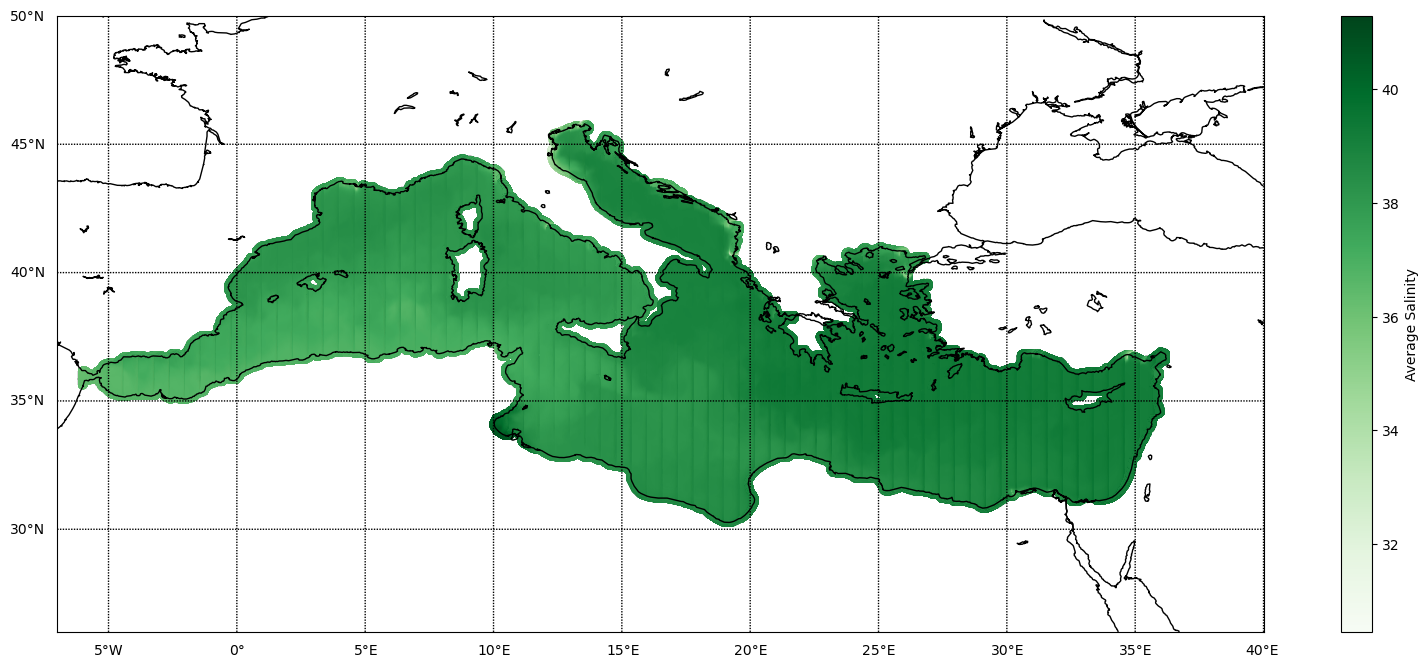

In [4]:
#salinity avg over 12 years

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df = pd.read_csv("../postprocessed/Salinity 2009-2021.csv")

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['Sodium'], cmap='Greens', norm=Normalize())

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average Salinity')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.savefig("../Maps/Salinity Average 2009-2021.png")



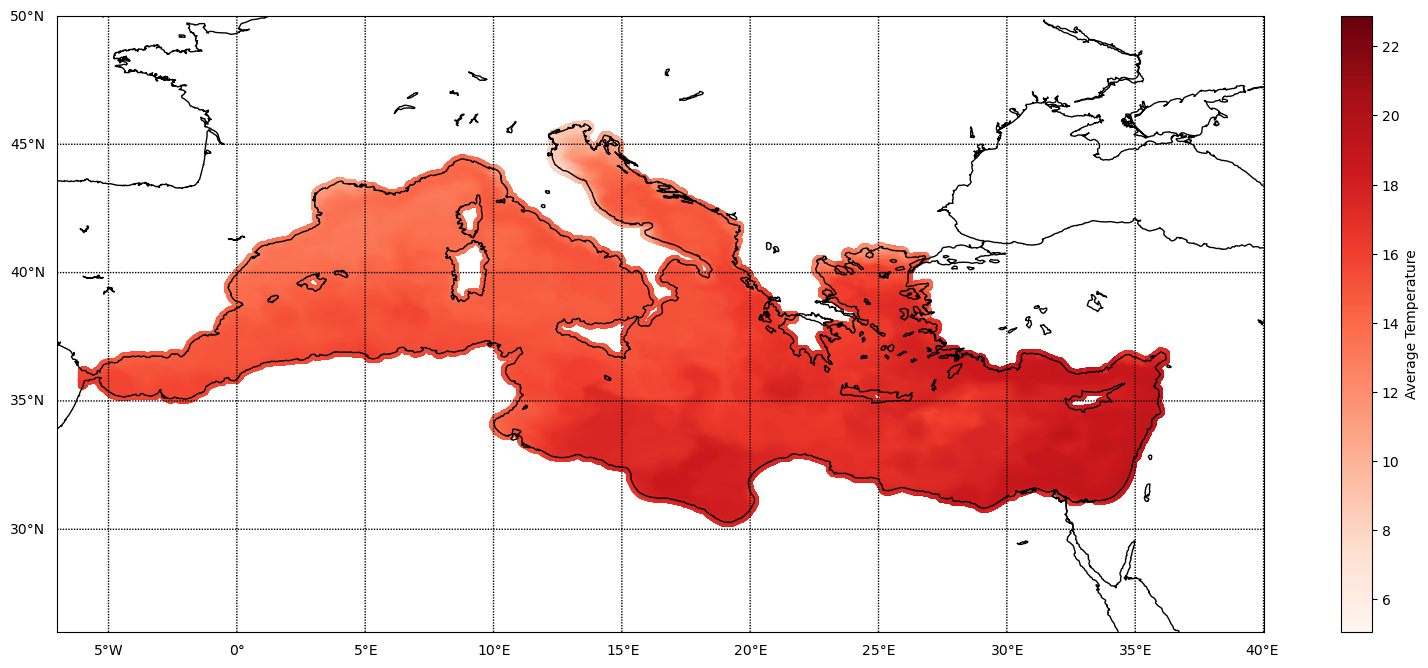

In [3]:
#temperature avg over 12 years

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df = pd.read_csv("../postprocessed/Temperature 2009-2021.csv")

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['Temperature'], cmap='Reds', norm=Normalize())

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average Temperature')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.savefig("../Maps/Temperature Average 2009-2021.png")


In [ ]:
#acidity avg over 12 years

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df = pd.read_csv("../postprocessed/Acidity 2009-2021.csv")

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['pH'], cmap='viridis', norm=Normalize())

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average pH')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.show()


In [ ]:
#Bio data to monthly maps

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df1 = pd.read_csv("../postprocessed/Acidity 2009-2021.csv")

months = df1["Month"].unique()

for month in months:
    df = df1[df1["Month"]==month]

    fig, ax = plt.subplots(figsize=(20, 8))

    # Create a basemap with the Robinson projection
    m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
                llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

    # Convert the longitude and latitude values to map coordinates
    x, y = m(df['Longitude'].values, df['Latitude'].values)

    # Use the scatter method to plot a continuous color gradient on the map
    sc = m.scatter(x, y, c=df['pH'], cmap='viridis', vmin=8.15,vmax=8.42)

    # Add a colorbar
    cb = plt.colorbar(sc)
    cb.set_label('Average pH')

    m.drawcoastlines()
    m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
    m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

    plt.savefig("../Maps/Test/Acidity/"+month+".png")


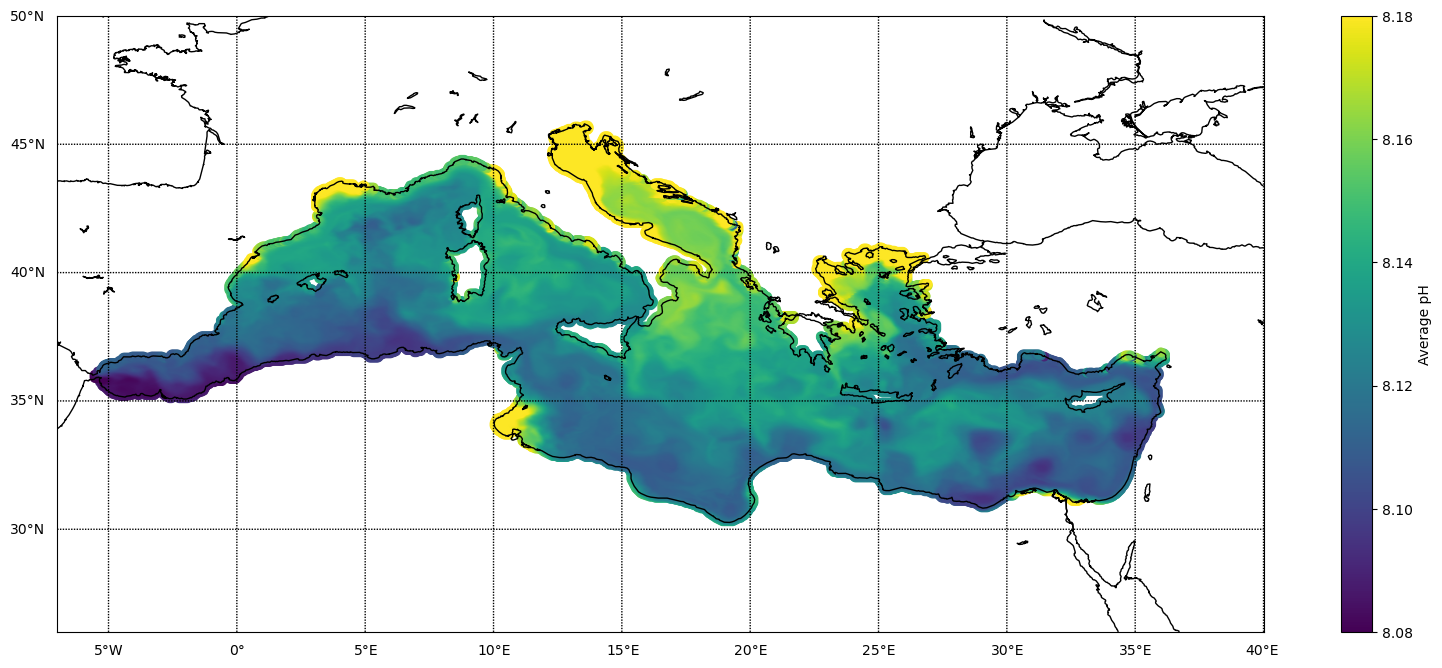

In [16]:
#test - acidity
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df1 = pd.read_csv("../postprocessed/Acidity 2009-2021.csv")

month="2010-01"

df = df1[df1["Month"]==month]

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['pH'], cmap='viridis',vmin=8.08, vmax=8.18)

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average pH')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.show()

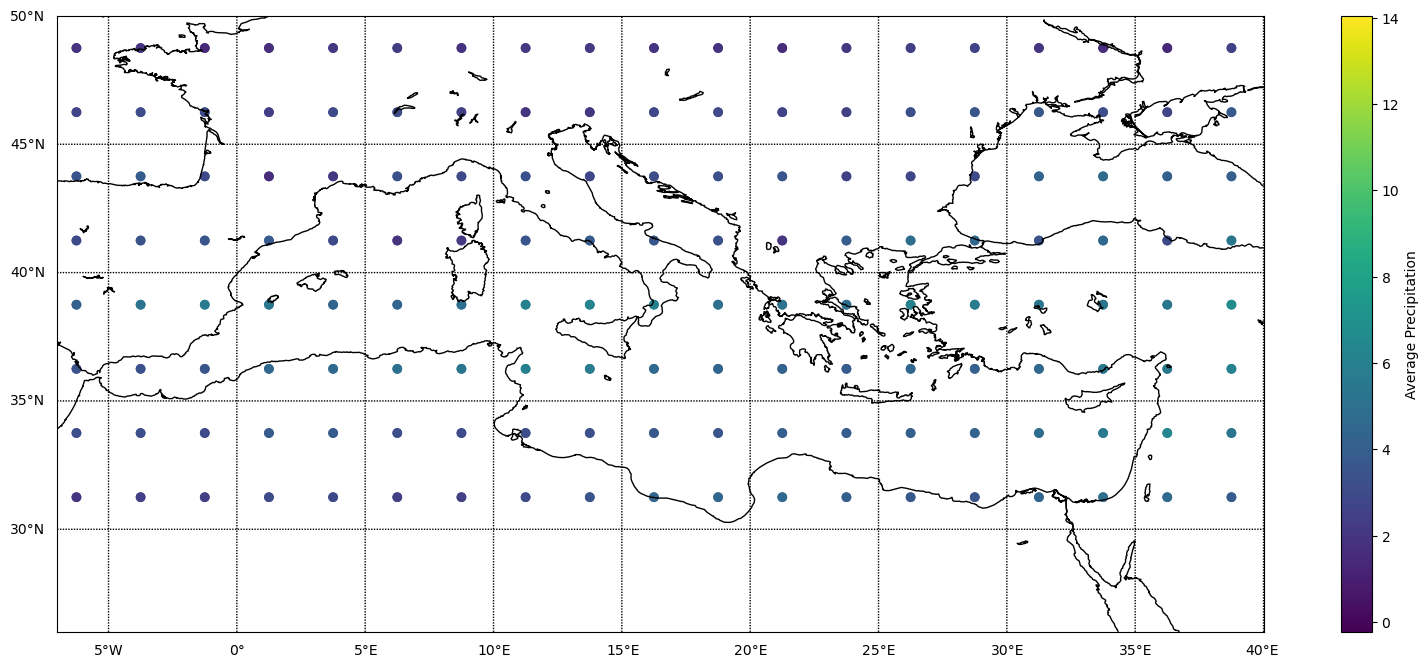

In [2]:
#test - acidity
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# Load the data into a Pandas DataFrame
df1 = pd.read_csv("../postprocessed/Precipitation 2009-2020.csv")

month="2010-01"

df = df1[df1["Month"]==month]

fig, ax = plt.subplots(figsize=(20, 8))

# Create a basemap with the Robinson projection
m = Basemap(projection='cyl',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')

# Convert the longitude and latitude values to map coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Use the scatter method to plot a continuous color gradient on the map
sc = m.scatter(x, y, c=df['Precipitation'], cmap='viridis')

# Add a colorbar
cb = plt.colorbar(sc)
cb.set_label('Average Precipitation')

m.drawcoastlines()
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

plt.show()